# NLP Using Python
- Tokenizing text using functions **word_tokenize** and **sent_tokenize**.
+ Computing Frequencies with **FreqDist** and **ConditionalFreqDist**.
* Generating Bigrams and collocations with **bigrams** and **collocations**.
- Stemming word affixes using **PorterStemmer** and **LancasterStemmer**.
+ Tagging words to their parts of speech using **pos_tag**.

## nltk
**nltk** is a popular Python framework used for developing Python programs to work with human language data.
- It provides access to over 50 text corpora and other lexical resources.
- It is a suite of text processing tools.
- It is free to use and Open source.
- It is available for Windows, Mac OS X, and Linux.

In [3]:
import nltk
from nltk.book import *
# nltk.download('punkt') already run

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
text = "Python is an interpreted high-level programming language for general-purpose programming. Created by Guido van Rossum and first released in 1991."

sentences = nltk.sent_tokenize(text)
print(f'sentences : {len(sentences)}')

words = nltk.word_tokenize(text)
print(f'words : {len(words)}')
print(words[:5])

wordfreq = nltk.FreqDist(words)
print(f'4 most common word: {wordfreq.most_common(4)}')
print(wordfreq)

sentences : 2
words : 22
['Python', 'is', 'an', 'interpreted', 'high-level']
4 most common word: [('programming', 2), ('.', 2), ('Python', 1), ('is', 1)]
<FreqDist with 20 samples and 22 outcomes>


In [4]:
# nltk.download('book') already run.

NLTK Book module consits of 9 text class. Type the name of the text or sentence to view it.
- text1: Moby Dick by Herman Melville 1851
- text2: Sense and Sensibility by Jane Austen 1811
- text3: The Book of Genesis
- text4: Inaugural Address Corpus
- text5: Chat Corpus
- text6: Monty Python and the Holy Grail
- text7: Wall Street Journal
- text8: Personals Corpus
- text9: The Man Who Was Thursday by G . K . Chesterton 1908

In [5]:
text1.findall("<ty.*n*>")

typhoons; typhoon; type; typifies; tying; tyro; tyro; tyros;
tyrannical; tying; tyrant


### Basic Tasks with Text
In this topic, you will understand how to perform the following activities, using text1 as input text.

- Total Word Count
- Unique Word Count
- Transforming Words
- Word Coverage
- Filtering Words
- Frequency Distribution

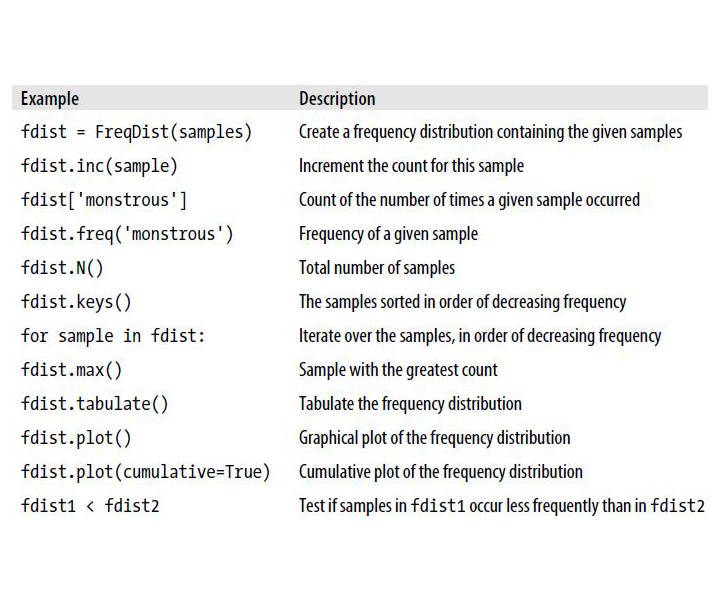

In [79]:
def text_insights(text):
    n_words = len(text)
    print(f'Word count in text = {n_words}')

    n_unique_words = len(set(text))
    print(f'Unique word count in text = {n_unique_words}')

    #let's check unique word count again after converting text into lowercase
    text_lowercase = [word.lower() for word in set(text)]
    n_lowercase_unique_words = len(set(text_lowercase))
    print(f'Lowercase Unique word count in text = {n_lowercase_unique_words}')

    # Word Coverage refers to an average number of times a word is occurring in the text.
    word_coverage1 = n_words / n_unique_words
    word_coverage2 = n_words / n_lowercase_unique_words

    print(f'Word converage considering case in text is {word_coverage1} \n\
Word converage neglecting case in text is  {word_coverage2} \n')

    # let's filter some words
    # example 1
    big_words = [word for word in set(text) if len(word) > 16]
    print(big_words,end='\n\n')

    # example 2
    sun_words_cs = [word for word in set(text) if word.lower().startswith('sun')] #case insensitive OR
    # sun_words_cs = [word for word in set(text) if word.upper().startswith('SUN')] #case insensitive
    sun_words_cis = [word for word in set(text) if word.startswith('Sun')] #case insensitive

    print(sun_words_cs,end='\n\n')
    print(sun_words_cis,end='\n\n')

    # Frequency distribution
    text_freq = nltk.FreqDist(text)
    print(f"Sunday word frequency in text = {text_freq['Sunday']}")

    top3_text = text_freq.most_common(3)
    print(f'Most common 3 words in text : \n{top3_text}')

In [80]:
text_insights(text6)

Word count in text = 16967
Unique word count in text = 2166
Lowercase Unique word count in text = 1855
Word converage considering case in text is 7.833333333333333 
Word converage neglecting case in text is  9.146630727762803 

[]

['sun', 'SUN']

[]

Sunday word frequency in text = 0
Most common 3 words in text : 
[(':', 1197), ('.', 816), ('!', 801)]


### Popular Text Corpora
1. **stopwords**  : Collection of stop words.
2. **reuters**    : Collection of news articles.
3. **cmudict**    : Collection of CMU Dictionary words.
4. **movie_reviews**: Collection of Movie Reviews.
5. **np_chat**    : Collection of chat text.
6. **names**      : Collection of names associated with males and females.
7. **state_union**: Collection of state union address.
8. **wordnet**    : Collection of all lexical entries.
9. **words**      : Collection of words in Wordlist corpus.
10. **Genesis**   : It is a collection of few words across multiple languages.
11. **Brown**     : It is the first electronic corpus of one million English words.
12. **Gutenberg** : Collections from Project Gutenberg
13. **Inaugural** : Collection of U.S Presidents inaugural speeches

In [5]:
# Any text corpus needs to be imported before using it.
from nltk.corpus import genesis

In [10]:
genesis.fileids()

['english-kjv.txt',
 'english-web.txt',
 'finnish.txt',
 'french.txt',
 'german.txt',
 'lolcat.txt',
 'portuguese.txt',
 'swedish.txt']

In [55]:
print(f"|{'fileid':-^18}|{'Avg word length':-^18}|{'Avg Sent length':-^18}|")
for fileid in genesis.fileids():
    n_chars = len(genesis.raw(fileid))
    n_words = len(genesis.words(fileid))
    n_sentences = len(genesis.sents(fileid))
    print(f"|{fileid:<18}|{(n_chars/n_words):^18.2f}|{(n_words/n_sentences):^18.2f}|")

|------fileid------|-Avg word length--|-Avg Sent length--|
|english-kjv.txt   |       4.37       |      30.51       |
|english-web.txt   |       4.28       |      19.74       |
|finnish.txt       |       5.94       |      15.06       |
|french.txt        |       4.15       |      23.01       |
|german.txt        |       4.60       |      23.13       |
|lolcat.txt        |       4.17       |      20.77       |
|portuguese.txt    |       4.11       |      27.02       |
|swedish.txt       |       4.63       |      30.09       |


**A text corpus is organized into any of the following four structures.**

- **Isolated** - Holds Individual text collections.
- **Categorized** - Each text collection tagged to a category.
- **Overlapping** - Each text collection tagged to one or more categories, and
- **Temporal** - Each text collection tagged to a period, date, time, etc.

**How to convert your collection of text files into a text corpus.**  

Suppose, you have three files **c1.txt, c2.txt and c3.txt** in **/usr/home/dict** path.  
Creation of corpus wordlists corpus is shown in the following example.  

```
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()
    ['c1.txt',
     'c2.txt',
     'c3.txt']
```